**Import Libraries**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# make plots prettier
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8,5)

**Load Data**

In [16]:
df = pd.read_csv("/content/er_clean.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (9216, 14)
Columns: ['Patient Admission Date', 'Patient Gender', 'Patient Age', 'Patient Race', 'Department Referral', 'Patient Admission Flag', 'Patient Satisfaction Score', 'Patient Waittime', 'Patients CM', 'Admission_Year', 'Admission_Month', 'Admission_Day', 'Admission_Hour', 'Admission_Weekday']


,Patient Admission Date,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM,Admission_Year,Admission_Month,Admission_Day,Admission_Hour,Admission_Weekday
0,2024-03-20 08:47:00,M,69,White,NaN,0,10.0,39,0,2024,3,20,8,Wednesday
1,2024-06-15 11:29:00,M,4,Native American/Alaska Native,NaN,1,5.0,27,0,2024,6,15,11,Saturday
2,2024-06-20 09:13:00,F,56,African American,General Practice,1,9.0,55,0,2024,6,20,9,Thursday
3,2024-02-04 22:34:00,F,24,Native American/Alaska Native,General Practice,1,8.0,31,0,2024,2,4,22,Sunday
4,2024-09-04 17:48:00,M,5,African American,Orthopedics,0,5.0,10,0,2024,9,4,17,Wednesday


**Universal Analysis**

Numeric Summary

In [17]:
display(df.describe())

,Patient Age,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM,Admission_Year,Admission_Month,Admission_Day,Admission_Hour
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000
mean,39.855143,0.500434,4.997830,35.259874,0.052083,2023.529297,6.674154,15.797635,11.486328
std,22.755125,0.500027,1.639712,14.735323,0.222207,0.499168,3.000606,8.818404,6.955110
min,1.000000,0.000000,0.000000,10.000000,0.000000,2023.000000,1.000000,1.000000,0.000000
25%,20.000000,0.000000,5.000000,23.000000,0.000000,2023.000000,4.000000,8.000000,5.000000
50%,39.000000,1.000000,5.000000,35.000000,0.000000,2024.000000,7.000000,16.000000,11.000000
75%,60.000000,1.000000,5.000000,48.000000,0.000000,2024.000000,9.000000,23.000000,18.000000
max,79.000000,1.000000,10.000000,60.000000,1.000000,2024.000000,12.000000,31.000000,23.000000


Age distribution

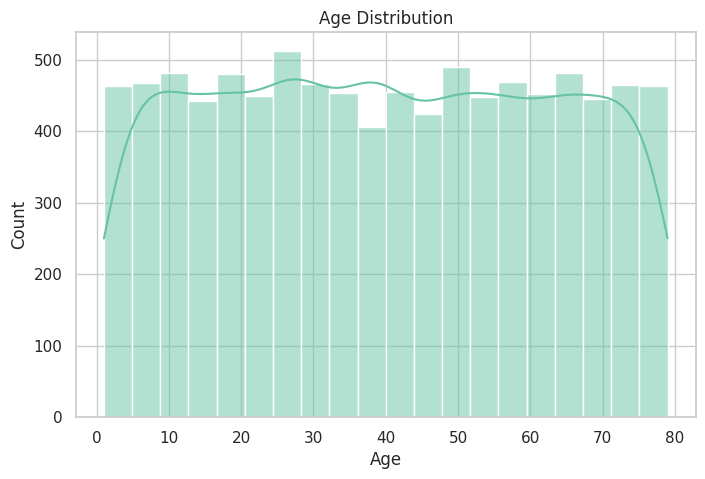

In [18]:
sns.histplot(df["Patient Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age"); plt.ylabel("Count")
plt.show()

Gender distribution

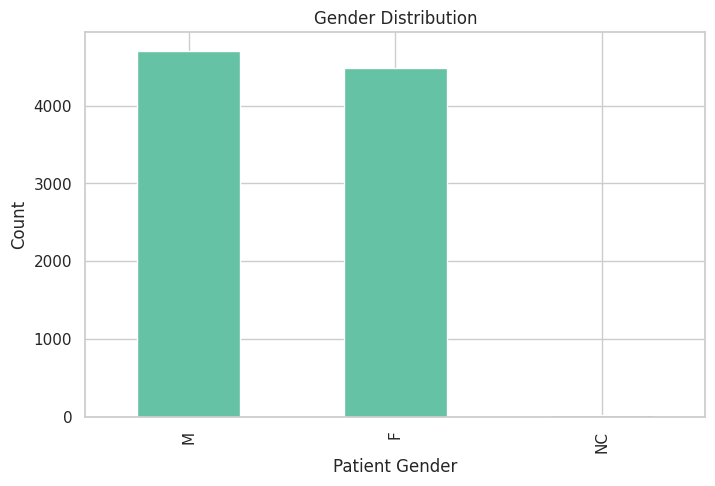

In [19]:
df["Patient Gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.show()

Race distribution (top 10 only)

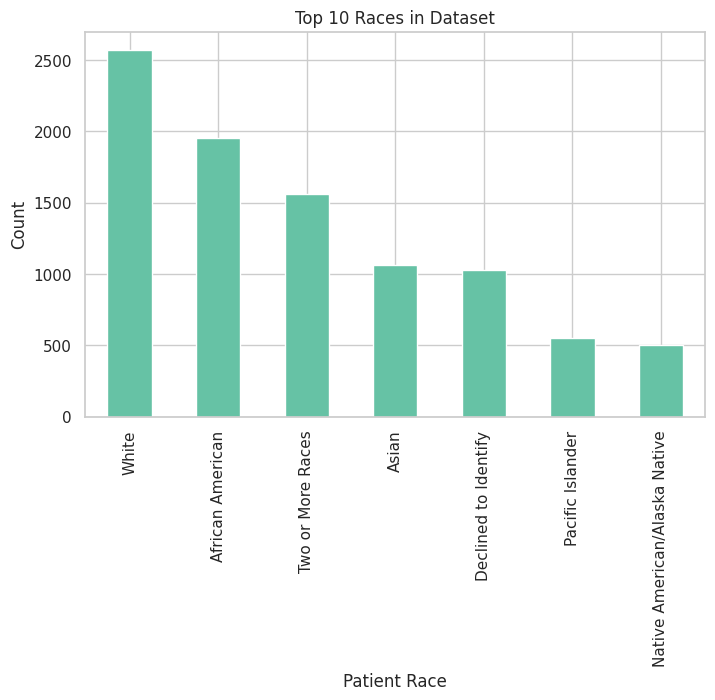

In [20]:
df["Patient Race"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Races in Dataset")
plt.ylabel("Count")
plt.show()

Department referrals

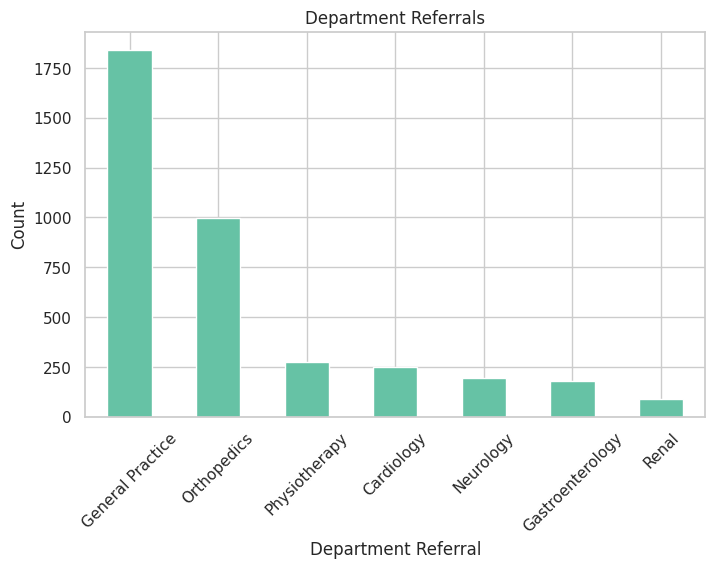

In [21]:
df["Department Referral"].value_counts().plot(kind="bar")
plt.title("Department Referrals")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Satisfaction distribution

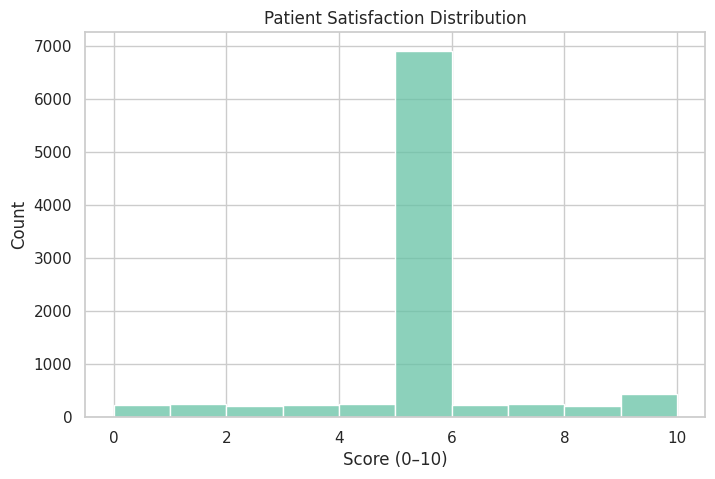

In [22]:
sns.histplot(df["Patient Satisfaction Score"], bins=10, kde=False)
plt.title("Patient Satisfaction Distribution")
plt.xlabel("Score (0–10)")
plt.show()

**BIVARIATE ANALYSIS**

Wait time overall

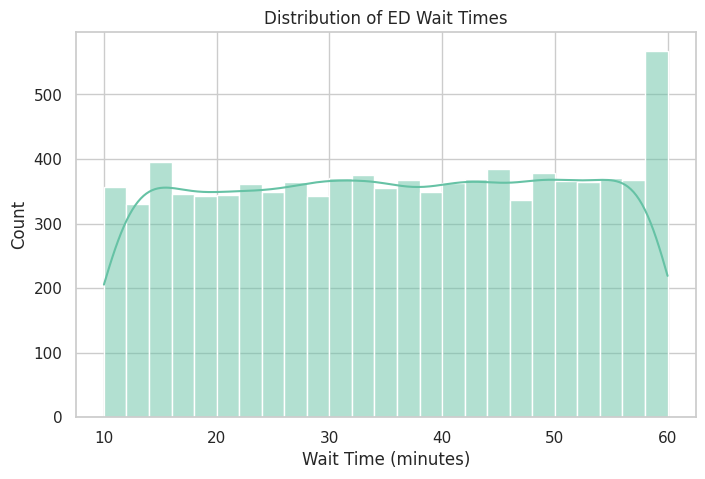

In [23]:
sns.histplot(df["Patient Waittime"], bins=25, kde=True)
plt.title("Distribution of ED Wait Times")
plt.xlabel("Wait Time (minutes)")
plt.ylabel("Count")
plt.show()

Wait time by gender

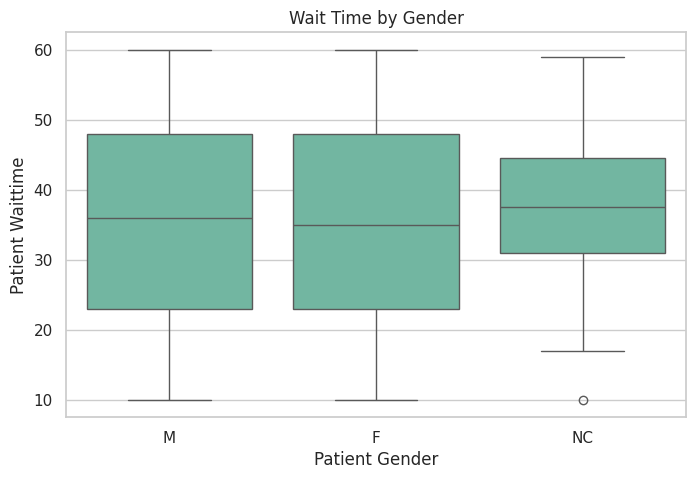

In [24]:
sns.boxplot(x="Patient Gender", y="Patient Waittime", data=df)
plt.title("Wait Time by Gender")
plt.show()

Wait time by admission outcome

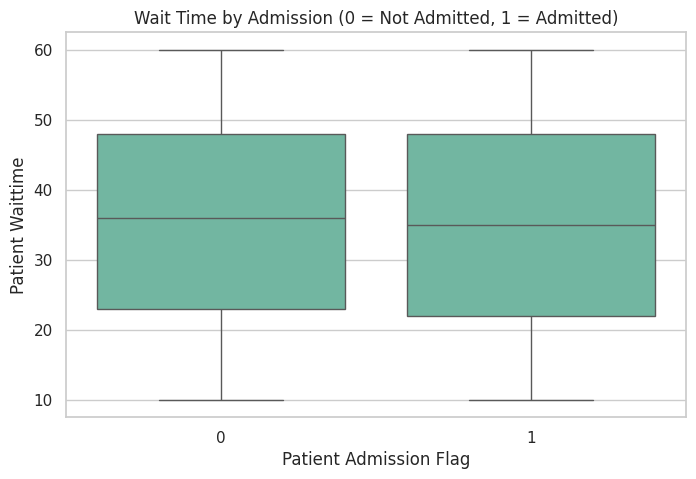

In [25]:
sns.boxplot(x="Patient Admission Flag", y="Patient Waittime", data=df)
plt.title("Wait Time by Admission (0 = Not Admitted, 1 = Admitted)")
plt.show()

Wait time by age group

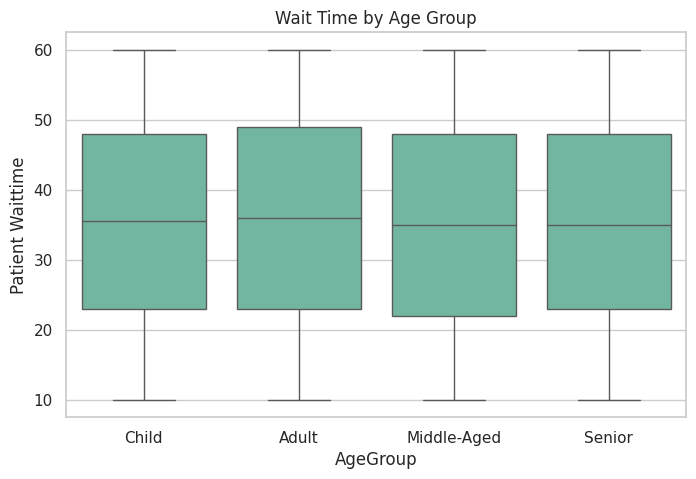

In [26]:
df["AgeGroup"] = pd.cut(df["Patient Age"], bins=[0,18,40,65,100],
                        labels=["Child","Adult","Middle-Aged","Senior"])
sns.boxplot(x="AgeGroup", y="Patient Waittime", data=df)
plt.title("Wait Time by Age Group")
plt.show()

Wait time by race (only common groups)

/tmp/ipython-input-132754995.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Patient Race", y="Patient Waittime",


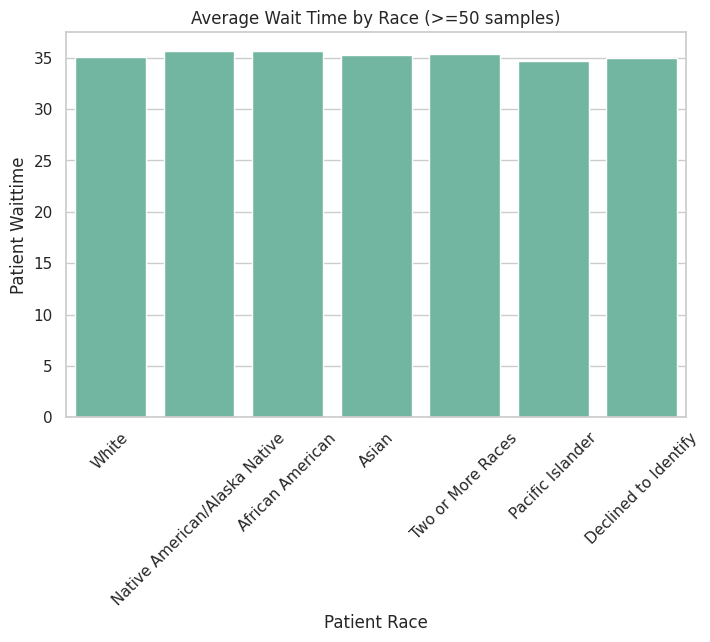

In [27]:
race_counts = df["Patient Race"].value_counts()
valid_races = race_counts[race_counts > 50].index
sns.barplot(x="Patient Race", y="Patient Waittime",
            data=df[df["Patient Race"].isin(valid_races)],
            ci=None)
plt.xticks(rotation=45)
plt.title("Average Wait Time by Race (>=50 samples)")
plt.show()

Wait time by department

/tmp/ipython-input-1691627952.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Department Referral", y="Patient Waittime", data=df, ci=None)


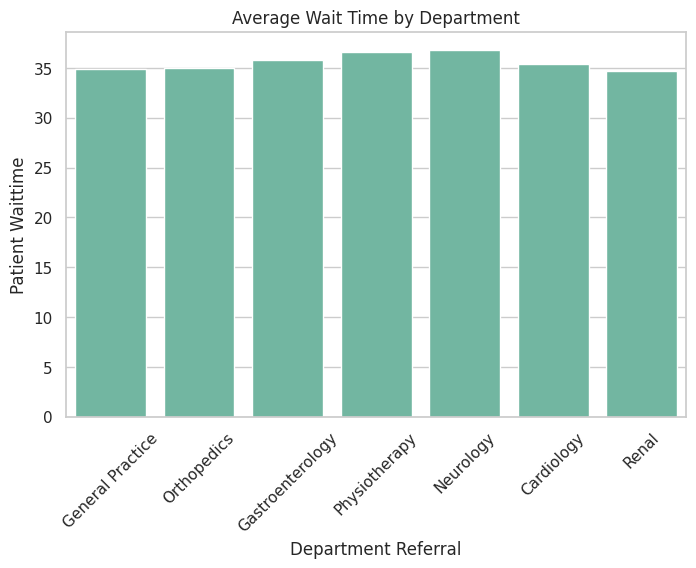

In [28]:
sns.barplot(x="Department Referral", y="Patient Waittime", data=df, ci=None)
plt.xticks(rotation=45)
plt.title("Average Wait Time by Department")
plt.show()

**TIME-BASED ANALYSIS**

Wait time by weekday

/tmp/ipython-input-2996747980.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Admission_Weekday", y="Patient Waittime", data=df,


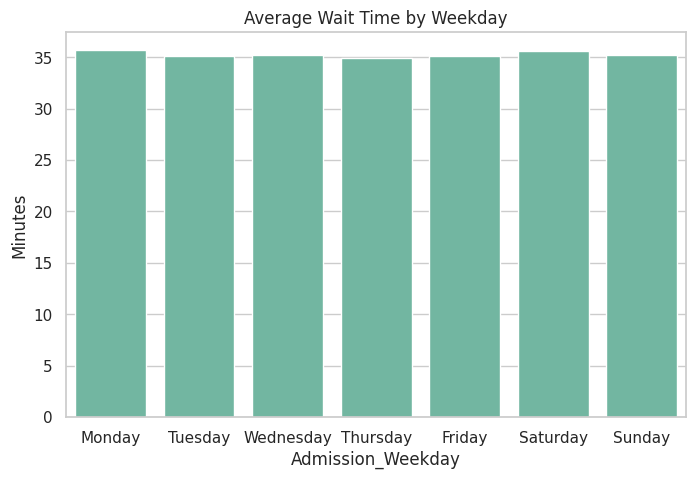

In [29]:
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.barplot(x="Admission_Weekday", y="Patient Waittime", data=df,
            order=weekday_order, estimator="mean", ci=None)
plt.title("Average Wait Time by Weekday")
plt.ylabel("Minutes")
plt.show()

Wait time by hour of day

/tmp/ipython-input-3449359996.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Admission_Hour", y="Patient Waittime", data=df, ci=None, marker="o")


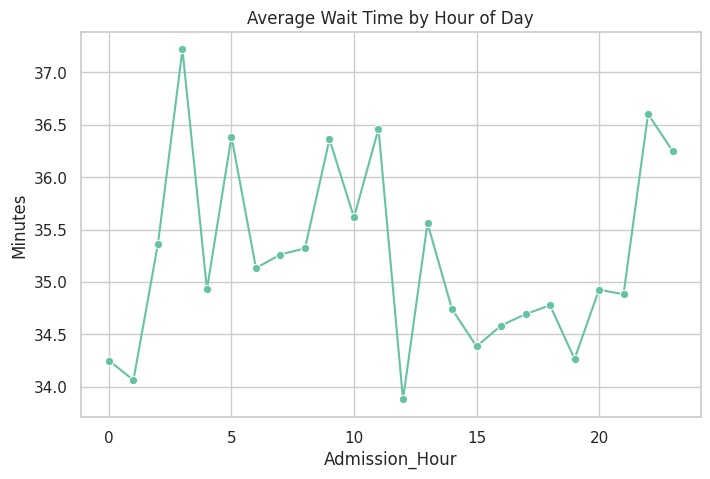

In [30]:
sns.lineplot(x="Admission_Hour", y="Patient Waittime", data=df, ci=None, marker="o")
plt.title("Average Wait Time by Hour of Day")
plt.ylabel("Minutes")
plt.show()

Heatmap: weekday × hour

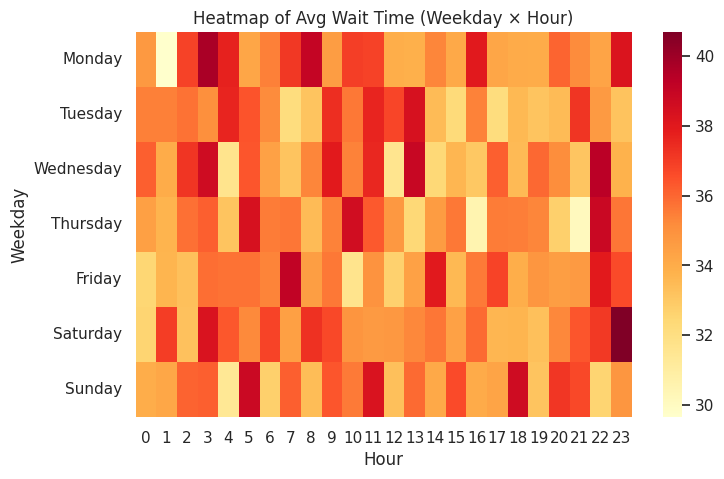

In [31]:
pivot = df.pivot_table(index="Admission_Weekday", columns="Admission_Hour",
                       values="Patient Waittime", aggfunc="mean")
pivot = pivot.reindex(weekday_order)

sns.heatmap(pivot, cmap="YlOrRd")
plt.title("Heatmap of Avg Wait Time (Weekday × Hour)")
plt.ylabel("Weekday")
plt.xlabel("Hour")
plt.show()

**SATISFACTION VS WAIT TIME**

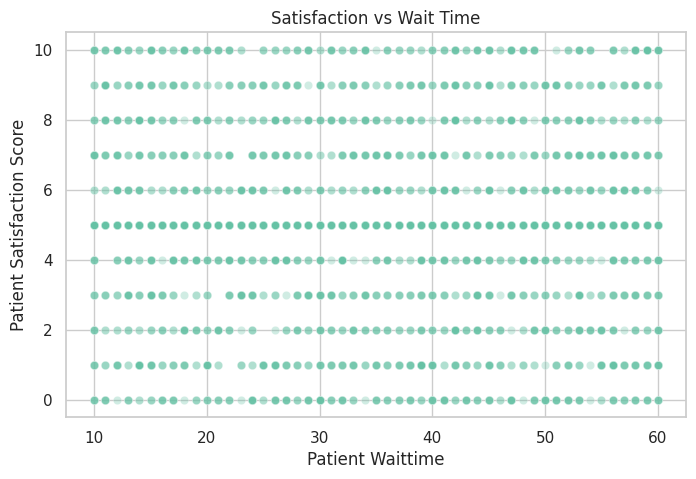

Correlation between Wait Time and Satisfaction: -0.011


In [32]:
sns.scatterplot(x="Patient Waittime", y="Patient Satisfaction Score", data=df, alpha=0.3)
plt.title("Satisfaction vs Wait Time")
plt.show()

corr_val = df["Patient Waittime"].corr(df["Patient Satisfaction Score"])
print("Correlation between Wait Time and Satisfaction:", round(corr_val, 3))

**MULTIVARIATE ANALYSIS**

Correlation heatmap (numeric features only)

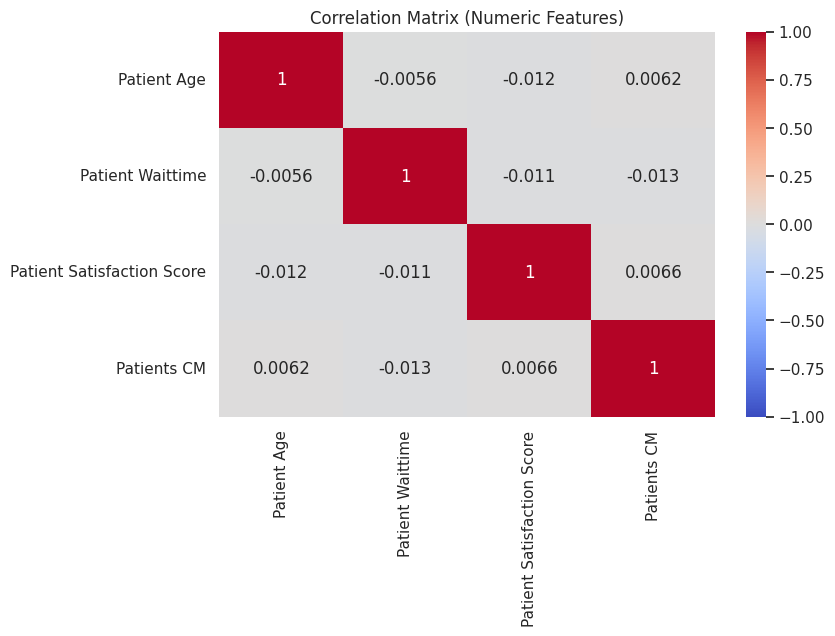

In [33]:
num_cols = ["Patient Age","Patient Waittime","Patient Satisfaction Score","Patients CM"]
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

Outliers in wait time

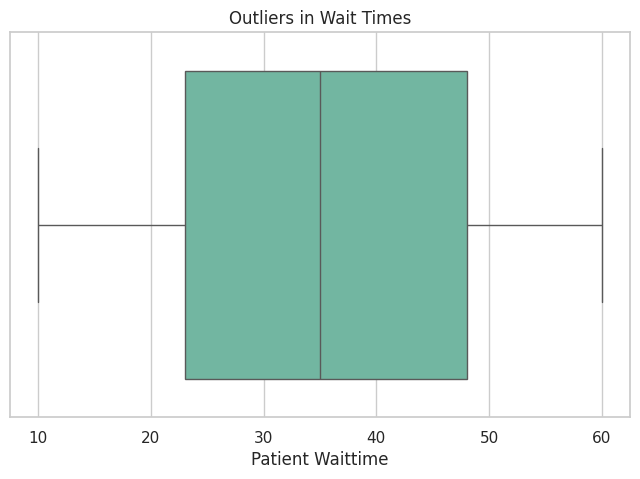

In [34]:
sns.boxplot(x=df["Patient Waittime"])
plt.title("Outliers in Wait Times")
plt.show()

Outliers in satisfaction

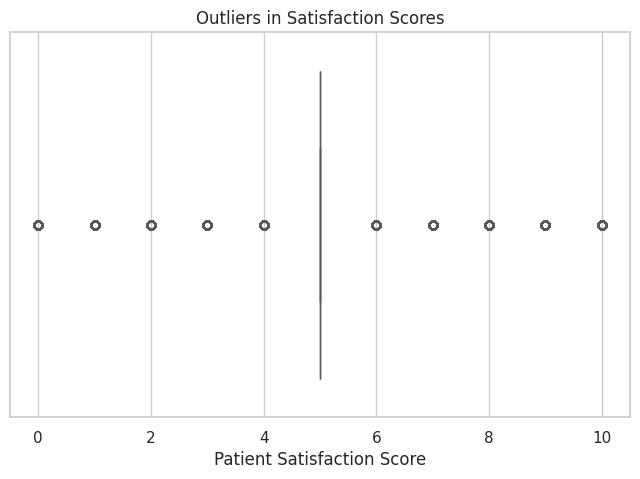

In [35]:
sns.boxplot(x=df["Patient Satisfaction Score"])
plt.title("Outliers in Satisfaction Scores")
plt.show()